In [1]:
#TODO demo pictures

#TODO why 0.29

#TODO fix edge bugs
#TODO not working - "Jim's"
#TODO normalization of + and - together?
#TODO ! and ? detaching!?
#text = "Tom said 'Jim's right!', Ann" # need to detach exclamation
#text = "Tom said 'Jim's right', Ann" # need to detach quotation
#TODO profile over n with max instead avg


# Massive English Tokenization Test Runs on Parallell-100 Corpus - Test 

# References

- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2655800/
- https://lena-voita.github.io/nlp_course/language_modeling.html
- https://en.wikipedia.org/wiki/Perplexity
- https://github.com/singnet/language-learning/issues/255
- https://medium.com/mlearning-ai/word-embeddings-wordpiece-and-language-agnostic-bert-labse-98c7626878c7


- https://github.com/natasha/razdel - razdel tries to mimic segmentation of these 4 datasets: SynTagRus, OpenCorpora, GICRYA and RNC. 
- https://www.kaggle.com/c/text-normalization-challenge-english-language
- https://www.kaggle.com/c/text-normalization-challenge-russian-language




In [2]:
import os, sys
cwd = os.getcwd()
project_path = cwd[:cwd.find('pygents')+7]
if project_path not in sys.path: sys.path.append(project_path)
os.chdir(project_path) 

#from importlib import reload  # Python 3.4+

import pickle
import pandas as pd

#force reimport
if 'pygents.util' in sys.modules:
    del sys.modules['pygents.util']
if 'pygents.text' in sys.modules:
    del sys.modules['pygents.text']
if 'pygents.plot' in sys.modules:
    del sys.modules['pygents.plot']
if 'pygents.token' in sys.modules:
    del sys.modules['pygents.token']


from pygents.token import *
from pygents.text import *
from pygents.util import *
from pygents.plot import plot_bars, plot_dict, matrix_plot


In [3]:
ref_tokenizer = DelimiterTokenizer()

In [4]:
brown_chars = FreedomTokenizer(name='data/models/brown_nolines_chars_7a',max_n=7,mode='chars',debug=False)
model_compress_with_loss(brown_chars.model,0.0001)


In [5]:
full_chars = FreedomTokenizer(name='data/models/gutenberg_brown_social_media_chars_7a',max_n=7,mode='chars',debug=False)
model_compress_with_loss(full_chars.model,0.01)


In [6]:
text = "Tom said \"Jim's right, Ann\" to Tim."


['Tom', ' ', 'said', ' ', '"', "Jim's", ' ', 'right', ',', ' ', 'Ann', '"', ' ', 'to', ' ', 'Tim', '.']
['Tom', ' ', 'said', ' ', '"', 'Jim', "'", 's', ' ', 'right', ',', ' ', 'Ann', '"', ' ', 'to', ' ', 'Tim', '.']


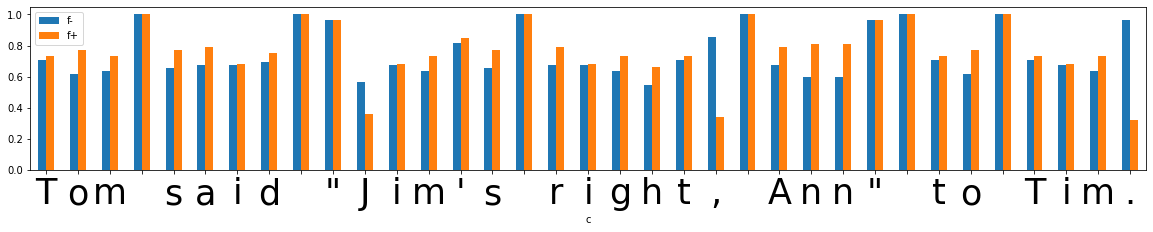

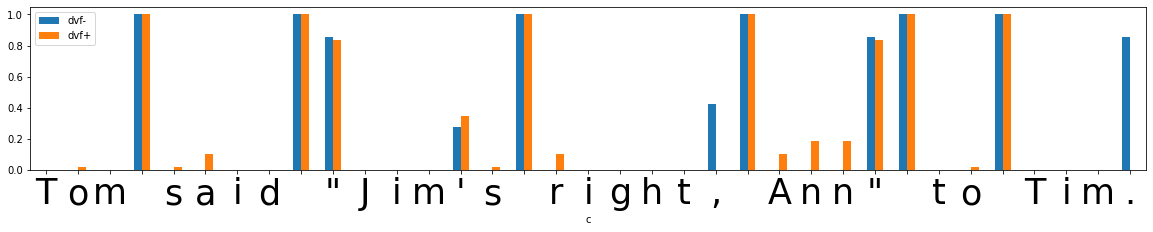

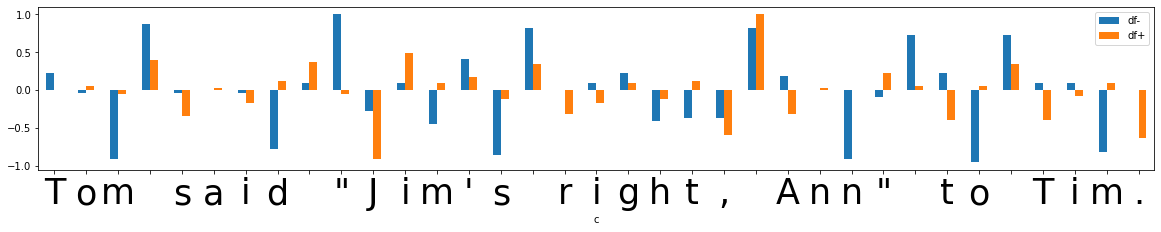

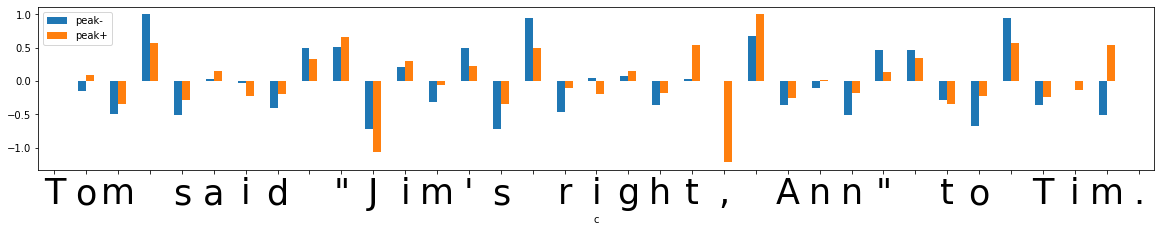

In [7]:
tokenizer = FreedomBasedTokenizer(brown_chars,'dvf-','dvf+')
tokenizer.set_options(nlist = [1], threshold=0.25)
print(ref_tokenizer.tokenize(text))
print(tokenizer.tokenize(text))
#df = profile_freedoms_ex_df(brown_chars.model,text,1)
df = profile_freedoms_avg_df(brown_chars.model,text,metrics=['f-','f+','df-','df+','peak-','peak+','dvf-','dvf+'],nlist=[1])
df['c'] = list(text)
plot_bars(df,'c',['f-','f+'])
plot_bars(df,'c',['dvf-','dvf+'])
plot_bars(df,'c',['df-','df+'])
plot_bars(df,'c',['peak-','peak+'])


In [8]:
#TODO probs

['Tom', ' ', 'said', ' ', '"', "Jim's", ' ', 'right', ',', ' ', 'Ann', '"', ' ', 'to', ' ', 'Tim', '.']
['T', 'om', ' ', 'said', ' ', '"', 'Ji', "m'", 's', ' ', 'right', ',', ' ', 'Ann', '"', ' ', 'to', ' ', 'Tim', '.']


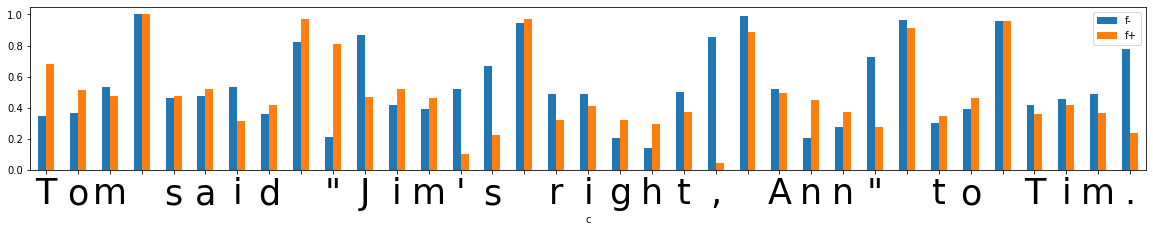

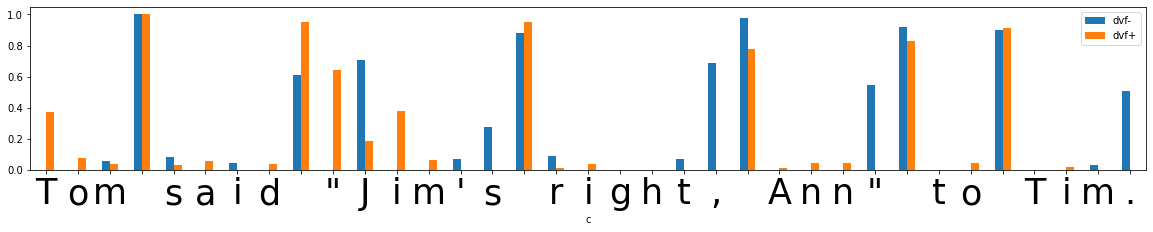

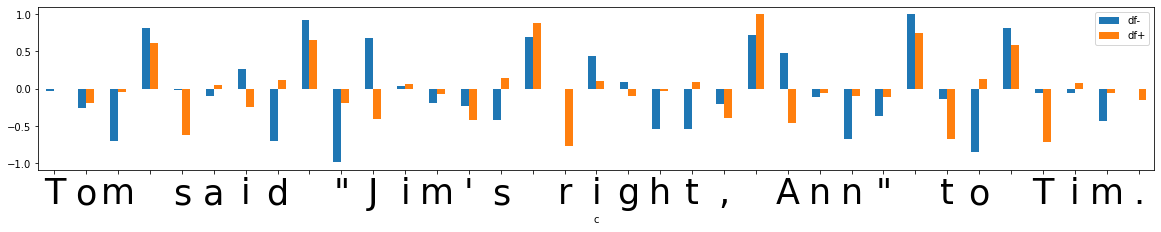

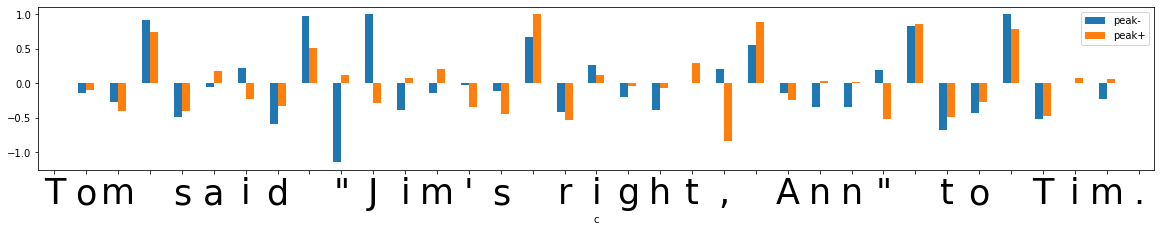

In [9]:
tokenizer = FreedomBasedTokenizer(full_chars,'dvf-','dvf+')
tokenizer.set_options(nlist = [1,2,3], threshold=0.25)
print(ref_tokenizer.tokenize(text))
print(tokenizer.tokenize(text))
#df = profile_freedoms_ex_df(brown_chars.model,text,1)
df = profile_freedoms_avg_df(full_chars.model,text,metrics=['f-','f+','df-','df+','peak-','peak+','dvf-','dvf+'],nlist=[1,2,3])
df['c'] = list(text)
plot_bars(df,'c',['f-','f+'])
plot_bars(df,'c',['dvf-','dvf+'])
plot_bars(df,'c',['df-','df+'])
plot_bars(df,'c',['peak-','peak+'])
